In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas for data-frame cleaning, manipulation and analysis. Show the findings by choosing different types of visualization in Matplotlib and Seaborn. Use Scipy, Stats and Numpy for statistical analysis. The data-set is  Seattle Crime Data Coding Challenge.


## Data preprocessing

### Data from the start of 2008

In [2]:
after_2008 = pd.read_csv("data/seattle-crime-stats-by-police-precinct-2008-present.csv")
after_2008.head()

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


In [3]:
# split report date into year, month, and day
date = after_2008["REPORT_DATE"].str.split("T", expand=True)[0].str.split("-", expand=True)
after_2008["REPORT_YEAR"], after_2008["REPORT_MONTH"], after_2008["REPORT_DAY"] = date[0].astype(int), date[1], date[2]

# drop unneccessary columns
after_2008.drop(["Police Beat", "CRIME_DESCRIPTION", "Sector", "Precinct", "Row_Value_ID", "REPORT_DATE"], axis=1, inplace=True)
after_2008.head()

,CRIME_TYPE,STAT_VALUE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY
0,Rape,1,2014,04,30
1,Assault,5,2014,04,30
2,Homicide,1,2014,04,30
3,Robbery,2,2014,04,30
4,Motor Vehicle Theft,7,2014,04,30


In [4]:
after = after_2008.groupby(['REPORT_YEAR', 'CRIME_TYPE'])["STAT_VALUE"].sum().unstack()

In [5]:
after

CRIME_TYPE,Assault,Burglary,Homicide,Larceny-Theft,Motor Vehicle Theft,Rape,Robbery
REPORT_YEAR,,,,,,,
2008,1669,6512,30,22383,3791,130,1588
2009,1918,6692,22,25003,3281,94,1769
2010,1936,6419,19,23132,3445,79,1415
2011,2101,6793,20,21369,3400,90,1406
2012,2179,6742,24,20280,3564,105,1422
2013,1942,7382,23,19727,4217,91,1590
2014,674,2252,7,7298,1695,31,471


### Data before 2008

In [6]:
before_2008 = pd.read_csv("data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv")
before_2008.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [7]:
before_2008.drop("Census_Tract_1990", axis=1, inplace=True)
before_2008 = before_2008[~before_2008.Crime_Type.str.contains("Total")]
# before_2008 = before_2008["Report_Year"].apply(str)
before_2008.head()

,Report_Year,Crime_Type,Report_Year_Total
0,1996,Aggravated Assault,11
1,1996,Homicide,0
2,1996,NonResidential Burglary,41
4,1996,Rape,2
5,1996,Residential Burglary,42


In [8]:
before_2008 = before_2008.groupby(["Report_Year", "Crime_Type"])["Report_Year_Total"].sum().unstack()
before_2008["Burglary"] = before_2008["Residential Burglary"] + before_2008["NonResidential Burglary"]
before_2008.drop(["NonResidential Burglary", "Residential Burglary"], axis=1, inplace=True)
before_2008.rename(columns={
    "Aggravated Assault": "Assault", 
    "Vehicle Theft": "Motor Vehicle Theft",
    "Theft": "Larceny-Theft"
}, inplace=True)

In [9]:
before_2008

Crime_Type,Assault,Homicide,Rape,Robbery,Larceny-Theft,Motor Vehicle Theft,Burglary
Report_Year,,,,,,,
1996,2247,35,238,1952,36600,6350,7842
1997,2628,49,203,2062,36168,7038,8124
1998,2431,47,220,1719,33098,8074,6940
1999,2266,44,170,1635,30300,8607,6446
2000,2446,36,161,1638,26238,8346,6134
2001,2332,25,145,1577,26337,8736,6662
2002,2304,27,135,1564,26606,8297,7277
2003,2208,34,152,1497,28595,9038,8527
2004,2022,24,139,1578,25708,9246,7727


### Concat `before_2008` and `after_2008`

In [10]:
data = pd.concat([before_2008, after], sort=True)

In [11]:
# drop 2014 data since it is incomplete (only collects data up to April of the year)
data = data[:-1]

data

,Assault,Burglary,Homicide,Larceny-Theft,Motor Vehicle Theft,Rape,Robbery
1996,2247,7842,35,36600,6350,238,1952
1997,2628,8124,49,36168,7038,203,2062
1998,2431,6940,47,33098,8074,220,1719
1999,2266,6446,44,30300,8607,170,1635
2000,2446,6134,36,26238,8346,161,1638
2001,2332,6662,25,26337,8736,145,1577
2002,2304,7277,27,26606,8297,135,1564
2003,2208,8527,34,28595,9038,152,1497
2004,2022,7727,24,25708,9246,139,1578
2005,2323,6746,25,27079,9548,133,1592


## Analysis

### How many total crimes were committed per year?

In [18]:
total = data.copy()
total["Total"] = sum([data[col] for col in data])
total["Total"]

1996    55264
1997    56272
1998    52529
1999    49468
2000    44999
2001    45814
2002    46210
2003    50051
2004    46444
2005    47446
2006    43434
2007    37559
2008    36103
2009    38779
2010    36445
2011    35179
2012    34316
2013    34972
Name: Total, dtype: int64

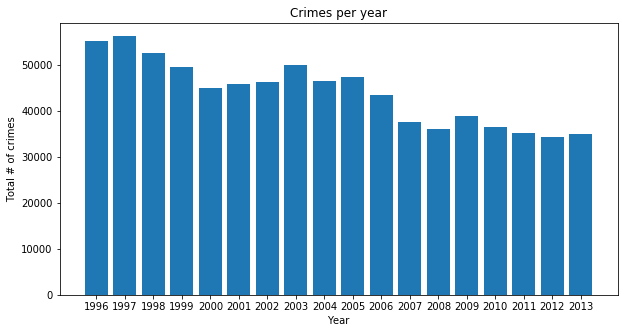

In [13]:
plt.figure(figsize=(10,5))
plt.bar(total.index, total["Total"])
plt.xticks(np.arange(1996, 2014))
plt.title("Crimes per year")
plt.xlabel("Year")
plt.ylabel("Total # of crimes")
plt.show()

### How has the total of each crime changed throughout the years?

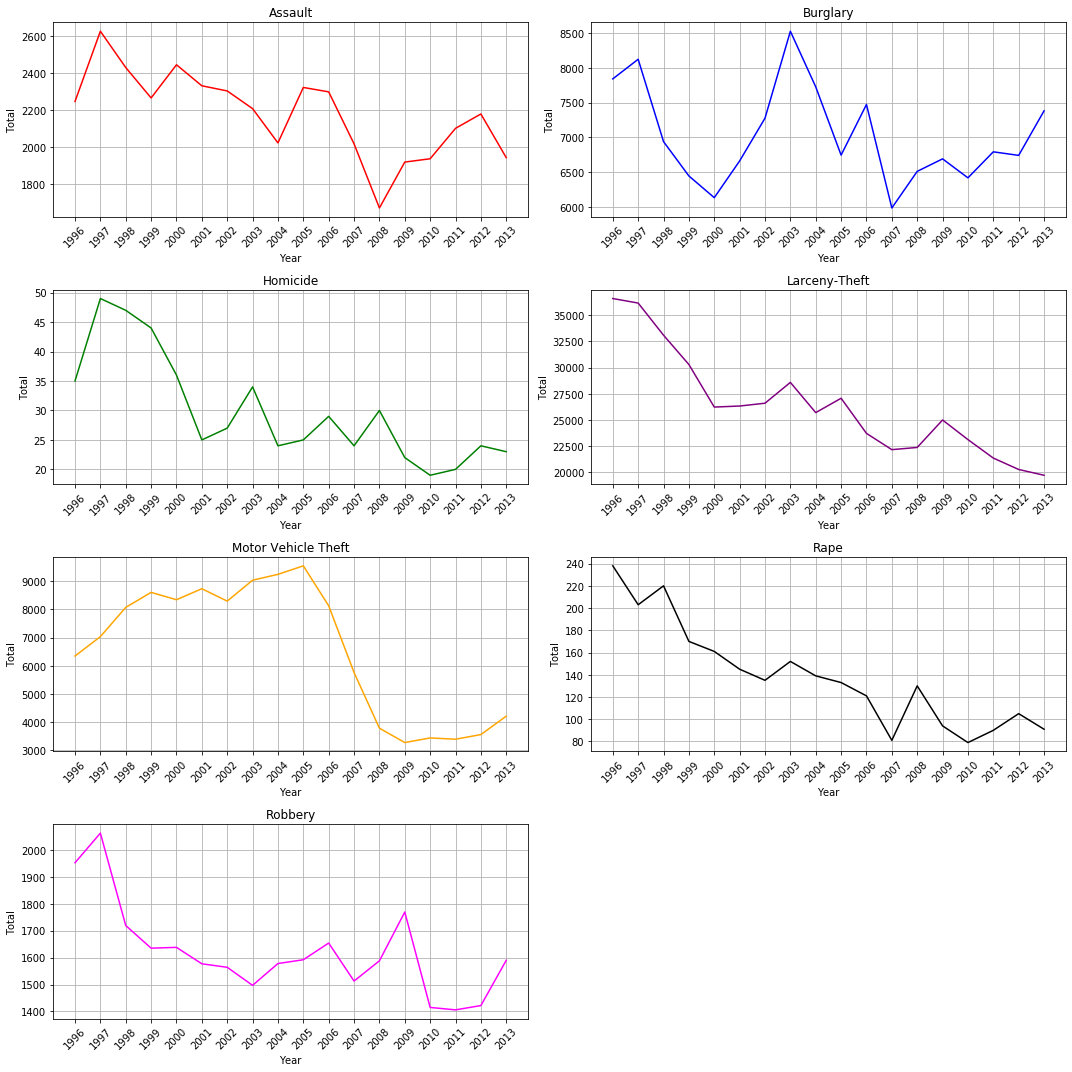

In [14]:
colors = ["red", "blue", "green", "purple", "orange", "black", "magenta"]
fig = plt.figure(figsize=(15,15))

for col, num in zip(data, range(1, len(data.index)+1)):
    ax = fig.add_subplot(4, 2, num)
    ax.plot(data.index, data[col], color=colors[num-1])
    ax.set_title(col)
    ax.set_xticks(np.arange(1996, 2014, 1))
    ax.set_xticklabels(data.index, rotation=45)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total")
    plt.grid(True)

plt.tight_layout()
plt.show()

### Do the months affect the number of crimes committed per year?

In [21]:
after = after_2008.groupby(["REPORT_YEAR", "REPORT_MONTH"])["STAT_VALUE"].sum().unstack().dropna()

In [22]:
after

REPORT_MONTH,01,02,03,04,05,06,07,08,09,10,11,12
REPORT_YEAR,,,,,,,,,,,,
2008,2712.0,2573.0,2803.0,2822.0,3064.0,3073.0,3210.0,3086.0,3164.0,3466.0,3262.0,2868.0
2009,3300.0,2688.0,3009.0,2952.0,3102.0,3139.0,3318.0,3430.0,3578.0,3458.0,3345.0,3460.0
2010,3764.0,2713.0,2952.0,2891.0,3245.0,3190.0,2921.0,3088.0,3034.0,2936.0,2799.0,2912.0
2011,2879.0,2358.0,2757.0,2702.0,3086.0,2979.0,3021.0,3285.0,3112.0,3190.0,2966.0,2844.0
2012,2815.0,2817.0,2959.0,2702.0,2989.0,2750.0,2919.0,2983.0,2811.0,2845.0,2835.0,2891.0
2013,2895.0,2329.0,2619.0,2595.0,3011.0,2658.0,2902.0,2938.0,3040.0,3380.0,3256.0,3349.0


In [ ]:
# colors = ["red", "blue", "green", "purple", "orange", "black", "magenta", "cyan", "pink", "gray", "brown"]
# fig = plt.figure(figsize=(15,15))

# for col, num in zip(after, range(1, len(after)+1)):
#     ax = fig.add_subplot(5, 2, num)
#     ax.plot(col, after[col], color=colors[num-1])
#     ax.set_title(month)
# #     ax.set_xticks(np.arange(1996, 2014, 1))
# #     ax.set_xticklabels(after.index, rotation=45)
#     ax.set_xlabel("Year")
#     ax.set_ylabel("Total")
#     plt.grid(True)

# plt.tight_layout()
# plt.show()



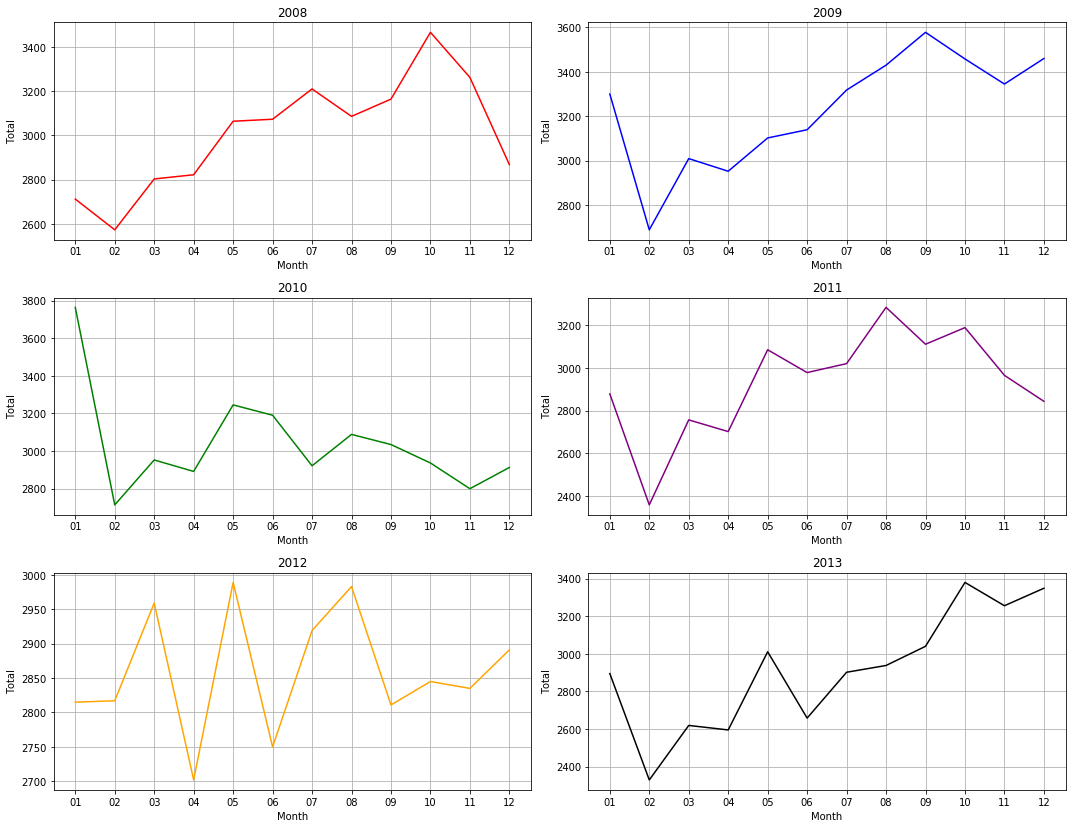

In [38]:
colors = ["red", "blue", "green", "purple", "orange", "black", "magenta"]
fig = plt.figure(figsize=(15,15))

for year, num in zip(after.index, range(1, len(after.index)+1)):
    ax = fig.add_subplot(4, 2, num)
    ax.plot(after.columns, after.loc[year], color=colors[num-1])
    ax.set_title(year)
    ax.set_xlabel("Month")
    ax.set_ylabel("Total")
    plt.grid(True)

plt.tight_layout()
plt.show()